# Back Propagation

- 수치미분을 통해 신경망의 가중치 매개변수의 기울기를 구함
    - 단순하고 구현하기 쉽지만 계산 시간이 오래 걸림
    - Backpropagation을 통해 가중치 매개변수의 기울기를 효율적으로 계산
## Computational Graph
- Computational graph를 도입: 계산과정을 그래프로 나타낸 것
    - Node, edge

    - 순전파(forward propagation): 계산 그래프에서 계산을 왼쪽에서 오른쪽으로 진행
    - 역전파(backward Propagation)
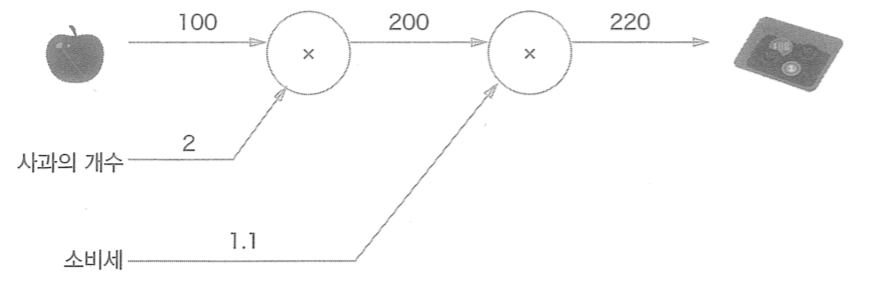
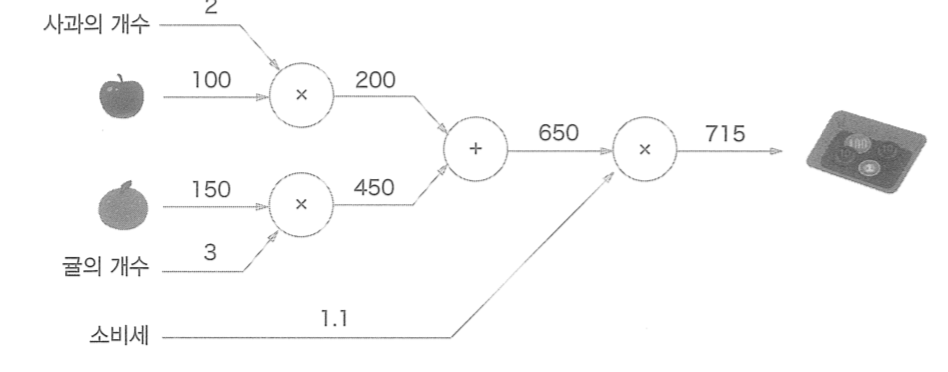

- 국소적 계산
    - 자신과 관계된 정보만으로 그 후의 결과를 출력
    - 전체 계산이 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화
    - 중간 계산 결과를 보관
    - 역전파를 통한 미분의 효율적 계산 가능
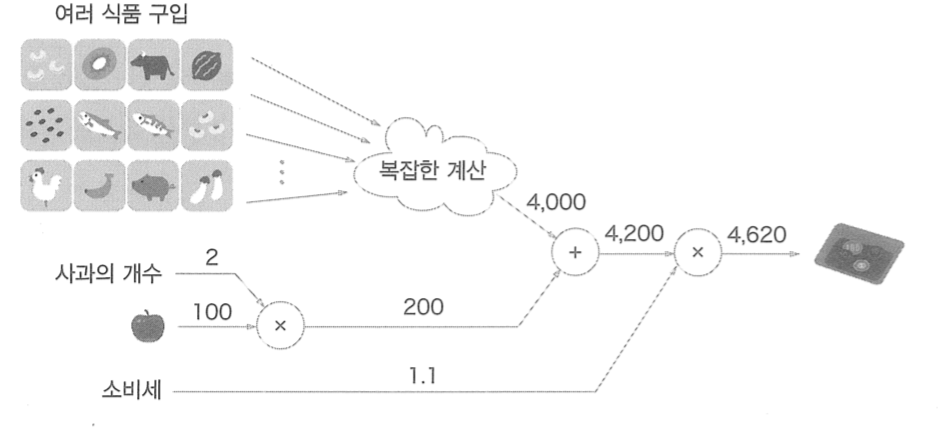

- 사과 가격(x)이 오르면 최종 금액(L)에 어떤 영향을 끼치는지?
    - ‘사과 가격에 대한 지불 금액의 미분＇
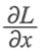
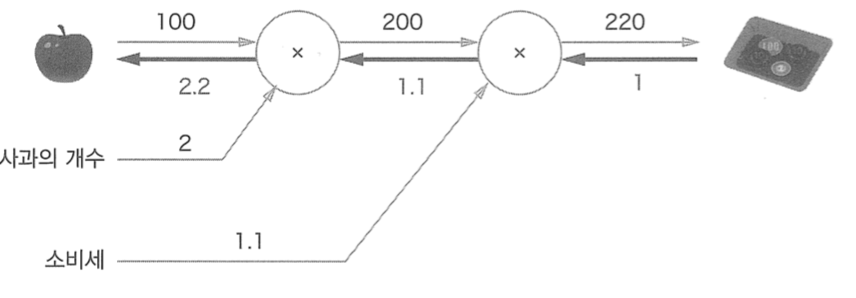

## Chain Rule
- 역전파는 국소적인 미분을 순방향과 반대인 오른쪽에서 왼쪽으로 전달
- *y=f(x)* 의 역전파
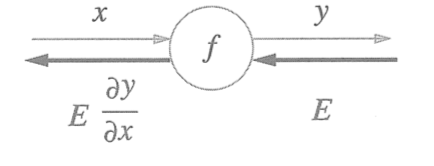
- 합성함수 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.
- *Z* = *(x+y)2*  
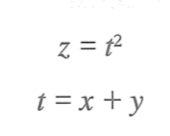
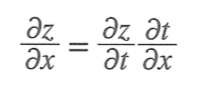
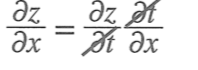
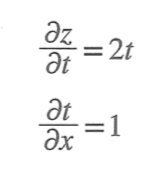
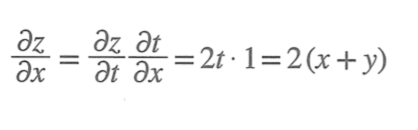

## Chain Rule and Compuatioanal Graph
- Chain rule and computational graph
    - *x*에 대한 *z*의 미분
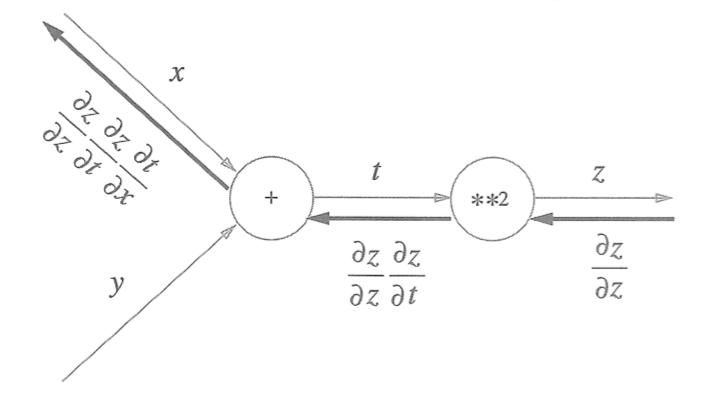
<br>
- 역전파가 하는 일은 연쇄법칙의 원리와 같다
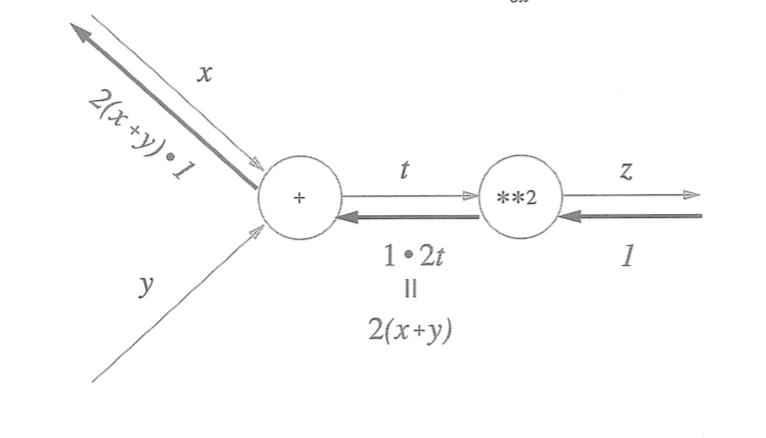


## Backpropagation
### Backpropagation of Addition
- 덧셈 노드의 역전파 
     - *z = x + y*

- 덧셈 노드의 역전파는 1을 곱하기만 할 뿐 입력된 값을 그대로 다음 노드로 보냄
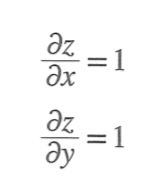
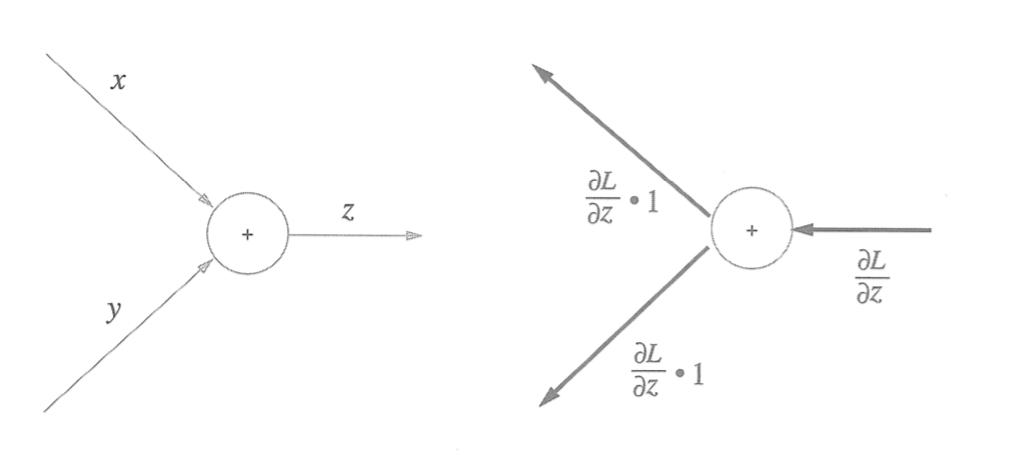
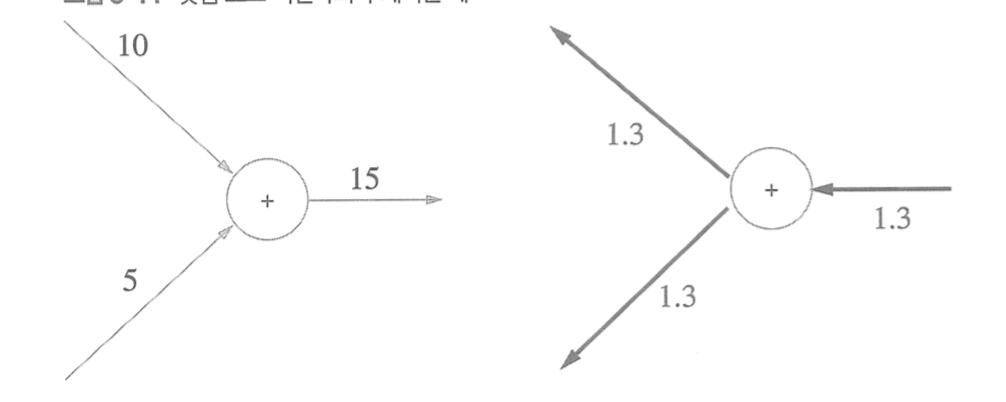


### Backpropagation of Multiplication
- *z = xy*
- 상류의 값에 순전파 때의 입력신호들을 서로 바꾼 값을 곱해서 하류로 보냄
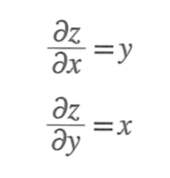
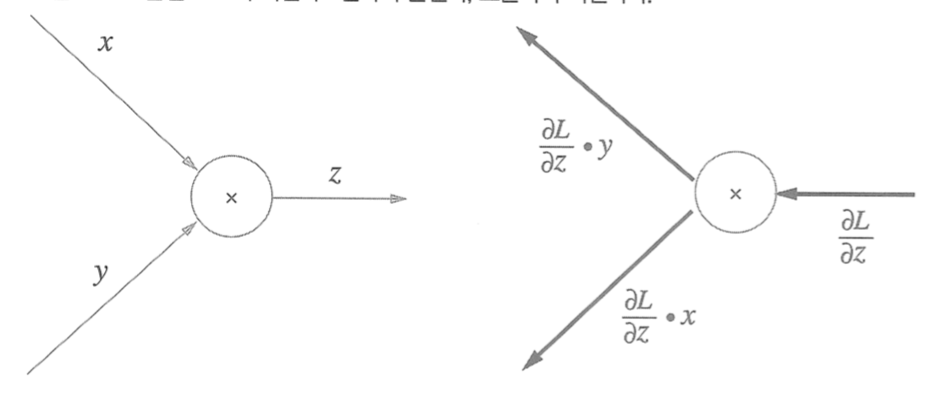
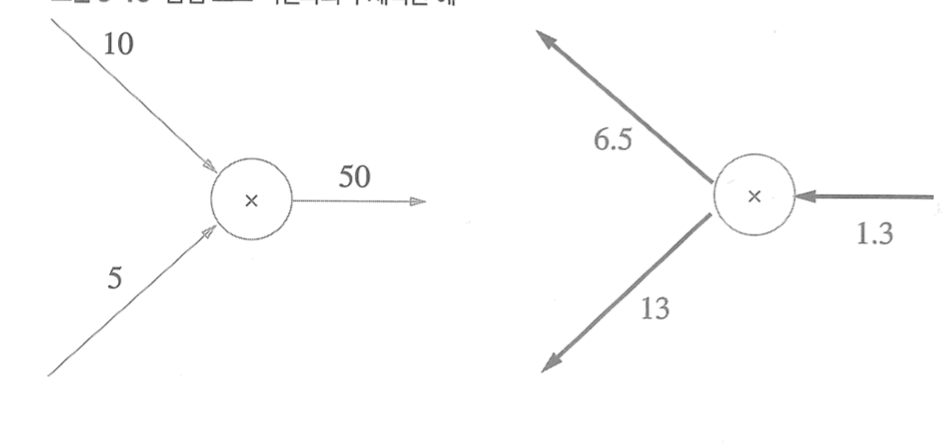
<br>
- 사과 쇼핑의 예
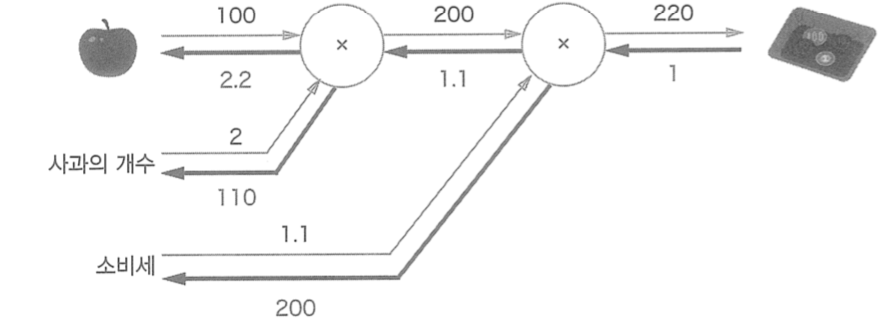


In [2]:
#Add, Multiply Layer
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy


class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

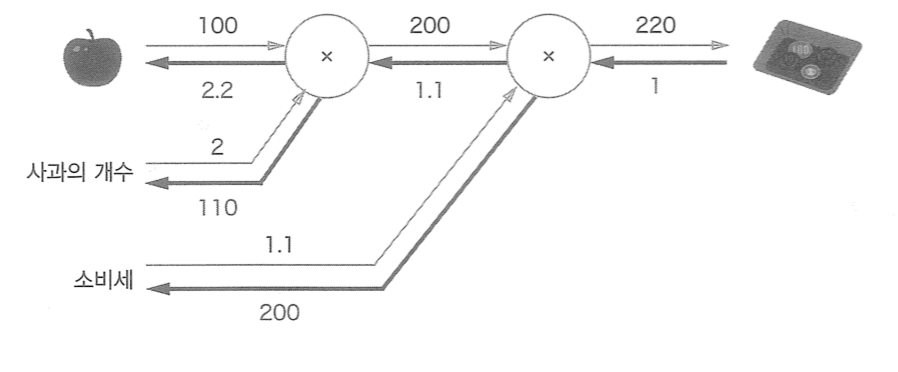

In [6]:
#buy apple

#from layer_naive import *


apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


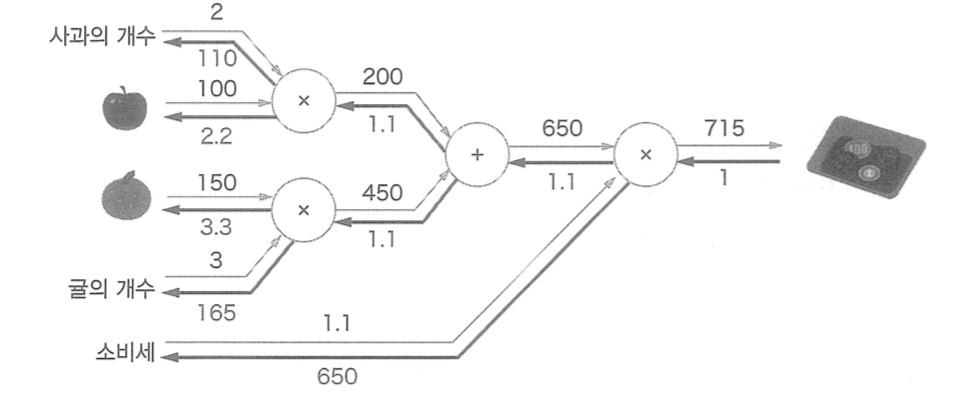

In [7]:
# coding: utf-8
#from layer_naive import *

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


## Backpropagation of Activation Functions
### ReLU
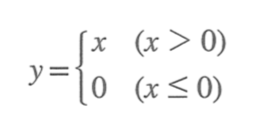
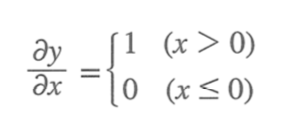
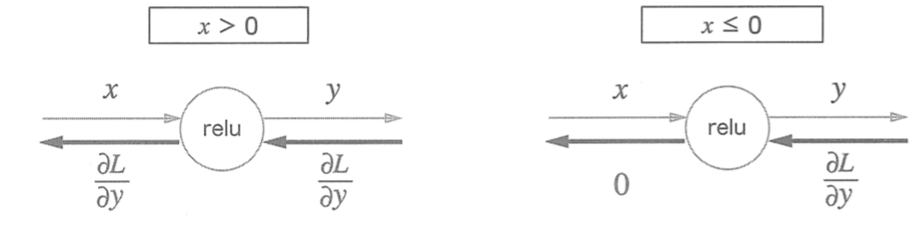

In [17]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [18]:
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x <=0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### Sigmoid
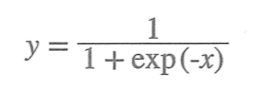
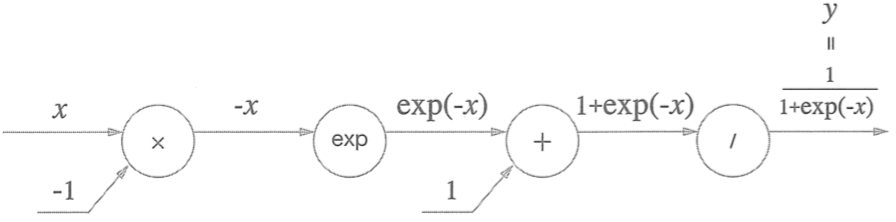
- 1단계 : y = 1/x을 미분하면
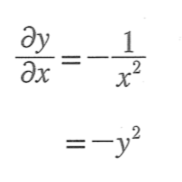
- 2단계
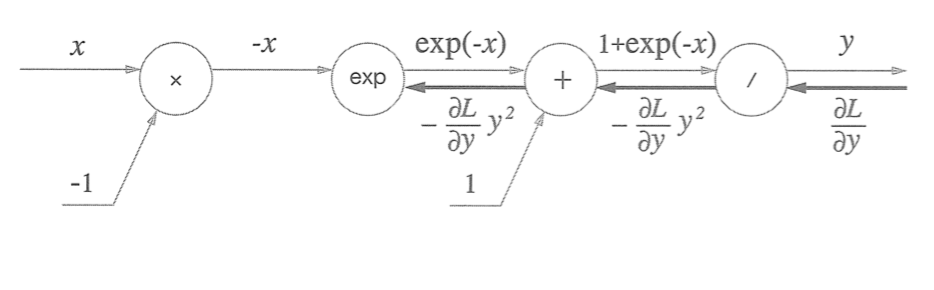
- 3단계
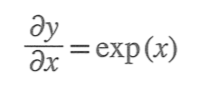
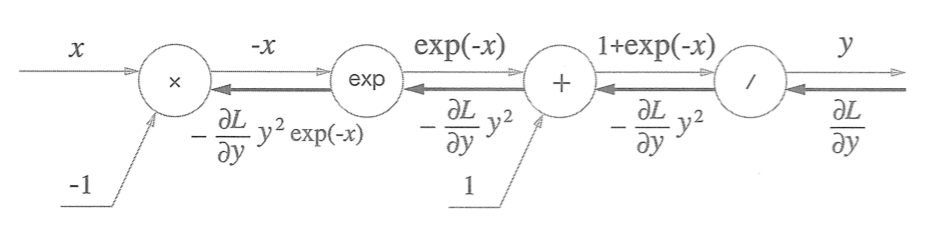
- 4단계
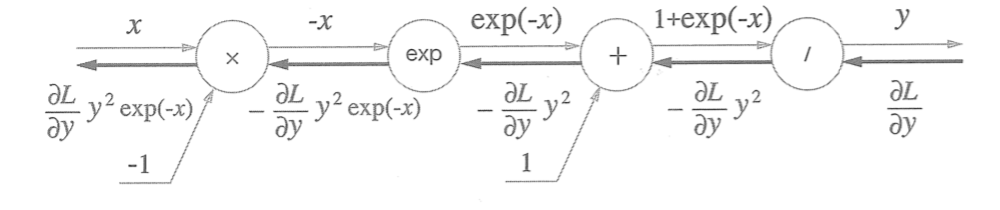
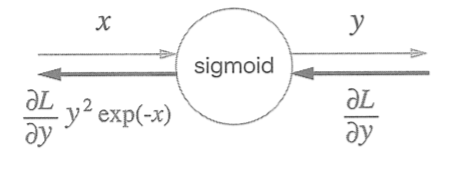
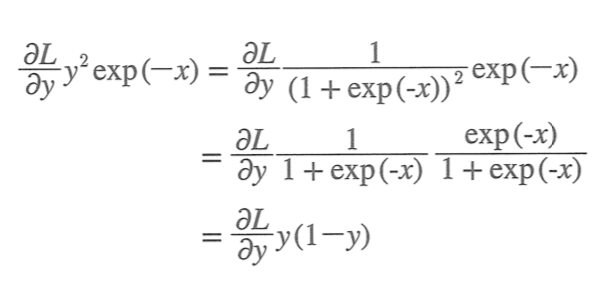
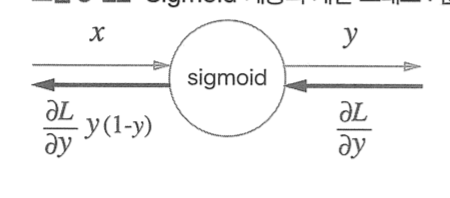

In [19]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

### Backpropagation of Affine Layers
- 신경망의 순전파 때 수행하는 행렬의 내적을 기하학에서는 affine transformation이라 함
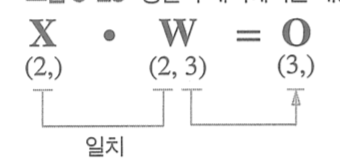
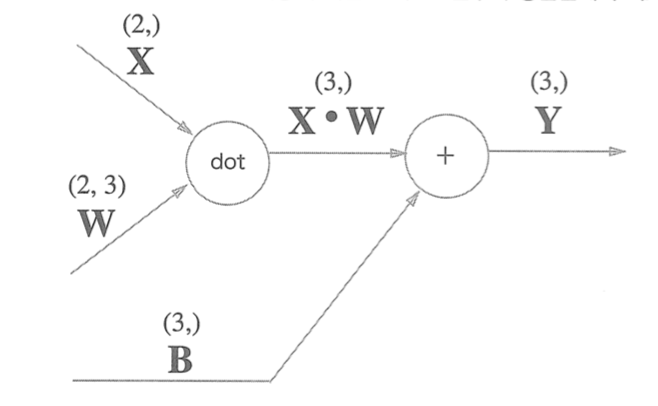
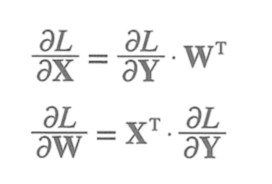
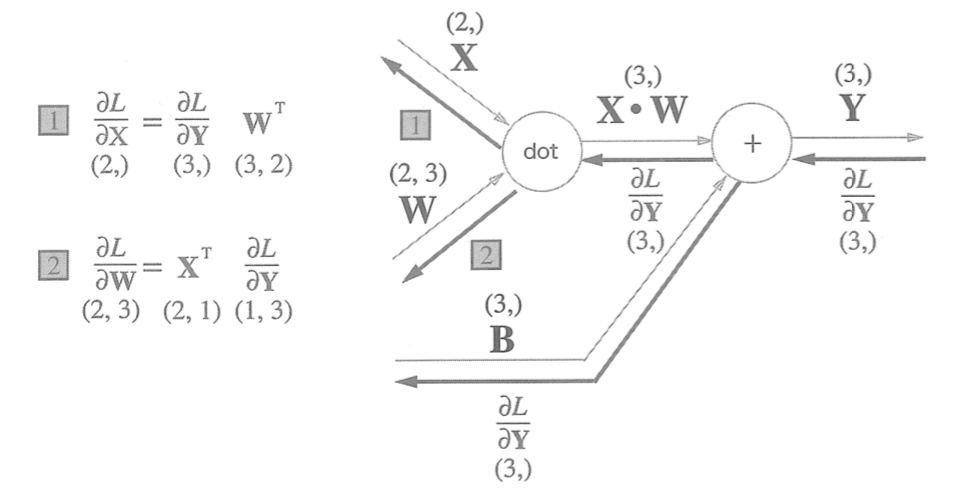
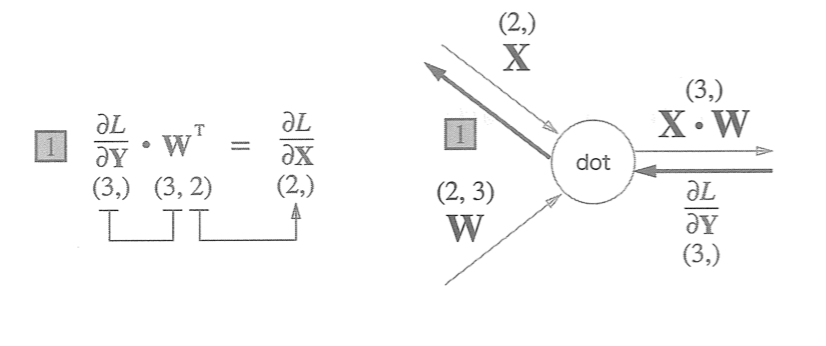

### Backpropagation of Batch Affine Layers
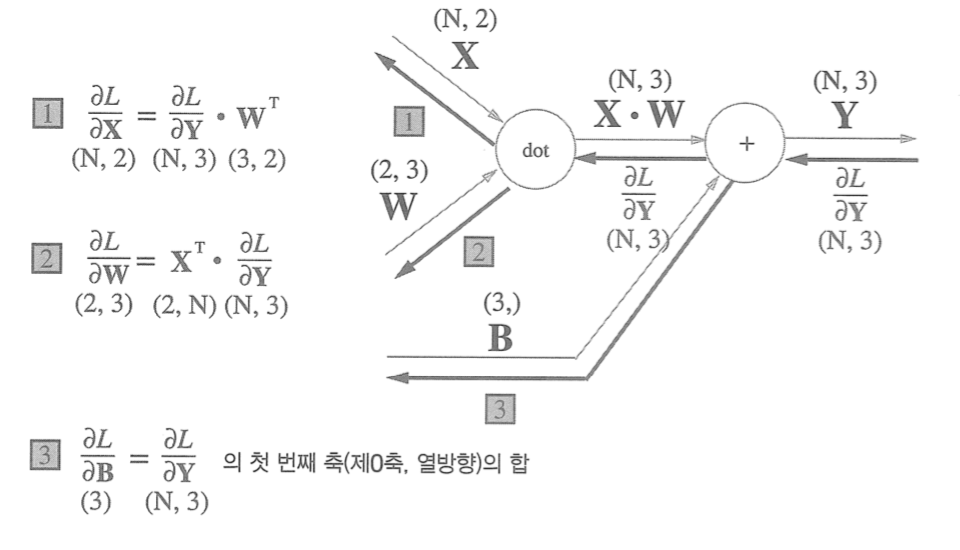

In [4]:
##Affine layer에서의 덧셈 편향
import numpy as np
X_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])

print (X_dot_W)
print (X_dot_W + B)

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]


In [6]:
## 데이터가 2개라고 한다면 bias의 역전파는 그 두 데이터에 대한 미분을 데이터마다 더해서 구합니다. axis=0의 총합을 구함
dY = np.array([[1,2,3],[4,5,6]])
print(dY)
dB = np.sum(dY, axis=0)
print (dB)

[[1 2 3]
 [4 5 6]]
[5 7 9]


In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

### Softmax-with-Loss Layer
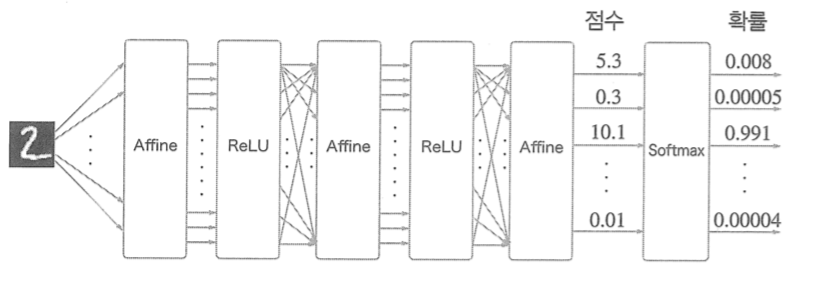
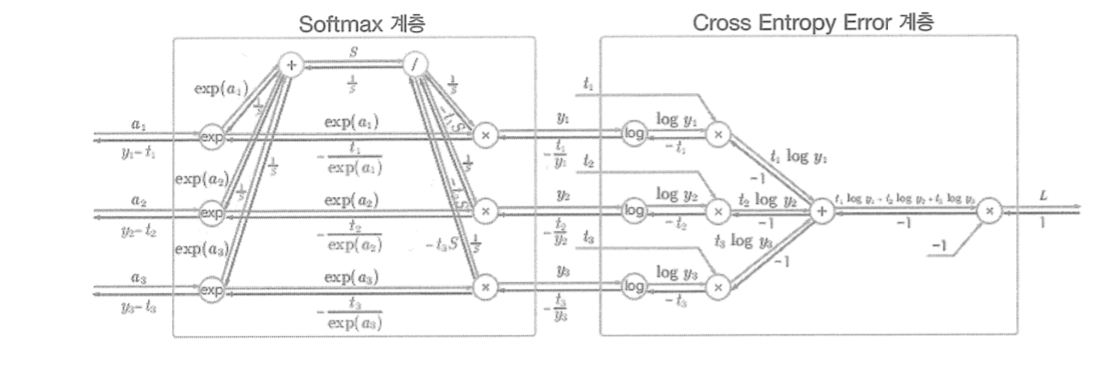
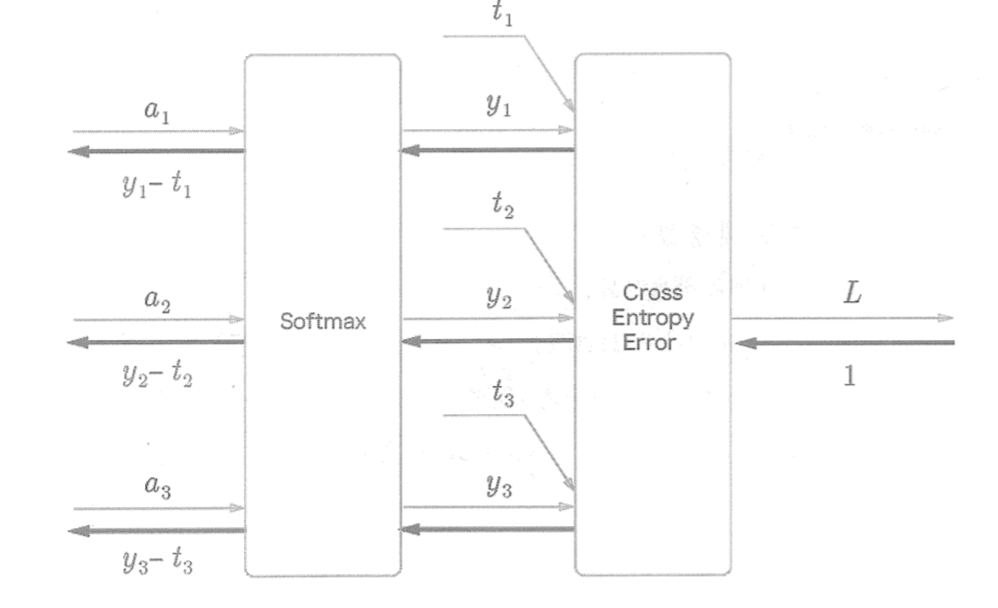

In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

### Gradient Backpropagation -Detailed
- cf. gradient in chapter 4

In [ ]:
 def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

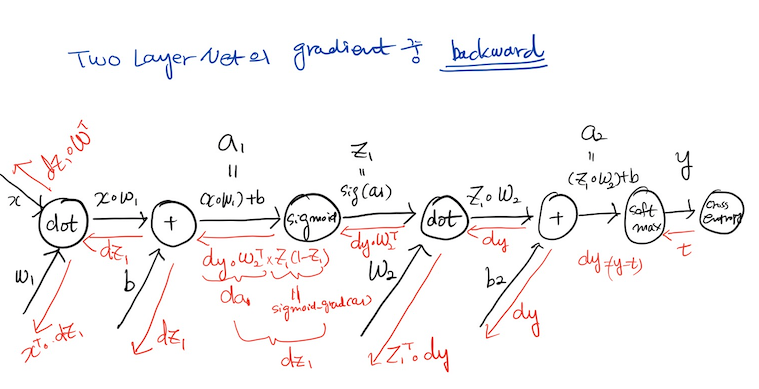

In [1]:
##TwoLayerNet with Backpropagation Using OrderedDict()
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    # x : 입력 데이터, t : 정답 레이블   
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

### Gradient Check with Backpropagation

In [2]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
#grad_numerical = network.gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:2.235105477721798e-06
b1:2.778514538808792e-05
W2:7.409385075455108e-09
b2:1.4014465567480095e-07


### Training with Backpropagation

In [3]:
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.15138333333333334, 0.1444
train acc, test acc | 0.9031333333333333, 0.9062
train acc, test acc | 0.9209333333333334, 0.9227
train acc, test acc | 0.9344, 0.9357
train acc, test acc | 0.9439833333333333, 0.9442
train acc, test acc | 0.9504666666666667, 0.9496
train acc, test acc | 0.9560833333333333, 0.9542
train acc, test acc | 0.95995, 0.9573
train acc, test acc | 0.9611833333333333, 0.9601
train acc, test acc | 0.9644666666666667, 0.9612
train acc, test acc | 0.9688333333333333, 0.9644
train acc, test acc | 0.9709833333333333, 0.9638
train acc, test acc | 0.9717, 0.9661
train acc, test acc | 0.97285, 0.9667
train acc, test acc | 0.9740833333333333, 0.967
train acc, test acc | 0.9758333333333333, 0.968
train acc, test acc | 0.9769833333333333, 0.9685
